# Analysis of Variance Test (ANOVA)

- Oneway ANOVA
- Tuckey's Test
- Kruskal-Wallis H Test
- Friedman Test

## Oneway ANOVA

`Analysis of variance (ANOVA)` is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample. 

ANOVA was developed by the statistician Ronald Fisher.

Assumptions
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Interpretation
- Ho: the means of the samples are equal.
- Ha: one or more of the means of the samples are unequal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")  
from scipy import stats as st

In [2]:
# Set the random number generator to a fixed sequence.
np.random.seed(50) 

In [3]:
g1_grades = np.random.normal(80, 6, size=50)
g2_grades = np.random.normal(81, 4, size=48)
g3_grades = np.random.normal(82, 5, size=52)

In [4]:
print('g1_grades: Min = %.2f, Mean = %.2f, Max = %.2f' %(g1_grades.min(), np.mean(g1_grades), g1_grades.max()))
print('g2_grades: Min = %.2f, Mean = %.2f, Max = %.2f' %(g2_grades.min(), np.mean(g2_grades), g2_grades.max()))
print('g3_grades: Min = %.2f, Mean = %.2f, Max = %.2f' %(g3_grades.min(), np.mean(g3_grades), g3_grades.max()))

g1_grades: Min = 70.00, Mean = 80.56, Max = 99.88
g2_grades: Min = 65.76, Mean = 80.92, Max = 91.82
g3_grades: Min = 69.78, Mean = 81.27, Max = 94.32


In [5]:
# Creating a dataframe with g1_grades
dfG1 = pd.DataFrame(columns=['Group','Grades'])
dfG1['Grades'] = g1_grades
dfG1['Group']  = 1
print(dfG1.shape)
dfG1.head()

(50, 2)


,Group,Grades
0,1,70.637887
1,1,79.814134
2,1,76.274429
3,1,71.212517
4,1,88.471677


In [6]:
# Creating a dataframe with g2_grades
dfG2 = pd.DataFrame(columns=['Group','Grades'])
dfG2['Grades'] = g2_grades
dfG2['Group']  = 2
print(dfG2.shape)
dfG2.head()

(48, 2)


,Group,Grades
0,2,77.827134
1,2,80.844658
2,2,91.821020
3,2,75.034446
4,2,81.383912


In [7]:
# Creating a dataframe with g3_grades
dfG3 = pd.DataFrame(columns=['Group','Grades'])
dfG3['Grades'] = g3_grades
dfG3['Group']  = 3
print(dfG3.shape)
dfG3.head()

(52, 2)


,Group,Grades
0,3,86.332124
1,3,79.322322
2,3,80.709255
3,3,82.235781
4,3,79.864674


In [8]:
frames = [dfG1, dfG2, dfG3]
data = pd.concat(frames, ignore_index=True)
print(data.shape)
data.head()

(150, 2)


,Group,Grades
0,1,70.637887
1,1,79.814134
2,1,76.274429
3,1,71.212517
4,1,88.471677


In [9]:
# Counting
data.Group.value_counts(sort=False)

1    50
2    48
3    52
Name: Group, dtype: int64

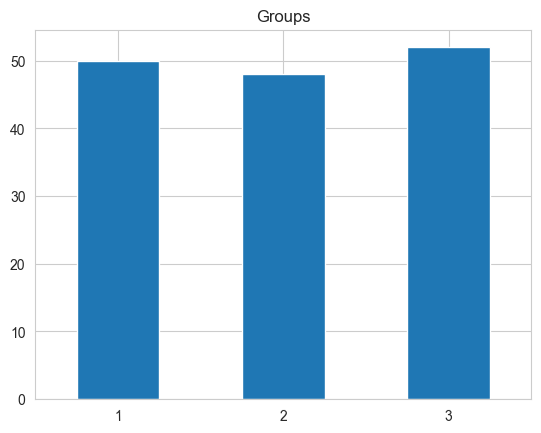

In [10]:
data.Group.value_counts(sort=False).plot(kind='bar', rot=True, title='Groups');

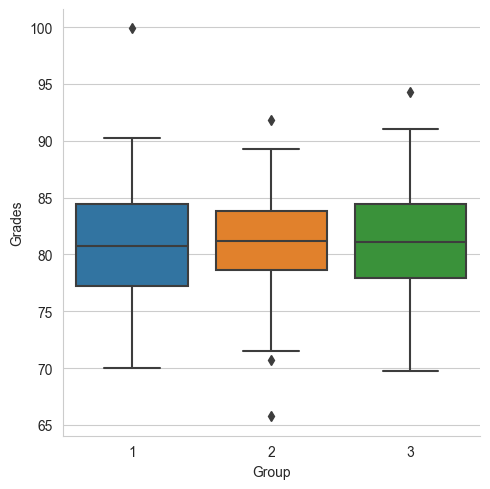

In [11]:
sns.catplot(data=data, x='Group', y='Grades', kind='box');

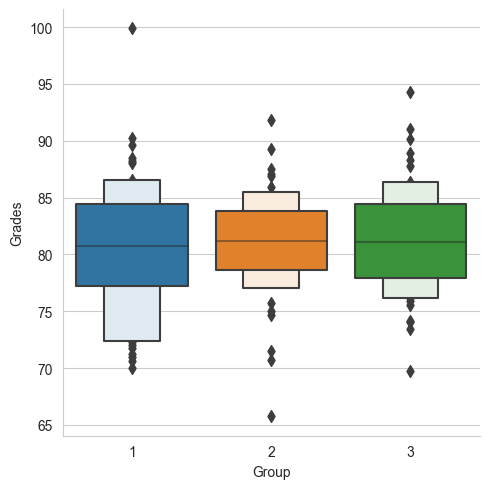

In [12]:
sns.catplot(data=data, x='Group', y='Grades', kind='boxen');

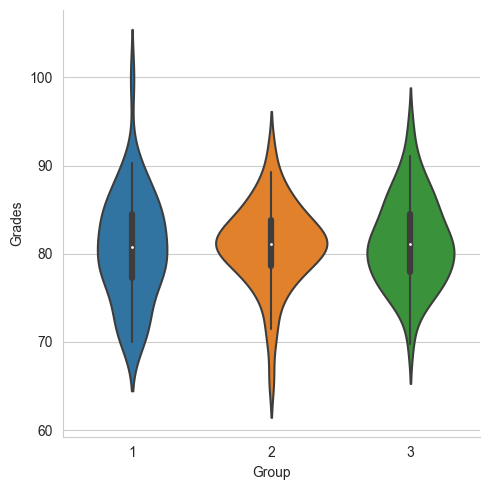

In [13]:
sns.catplot(data=data, x='Group', y='Grades', kind='violin');

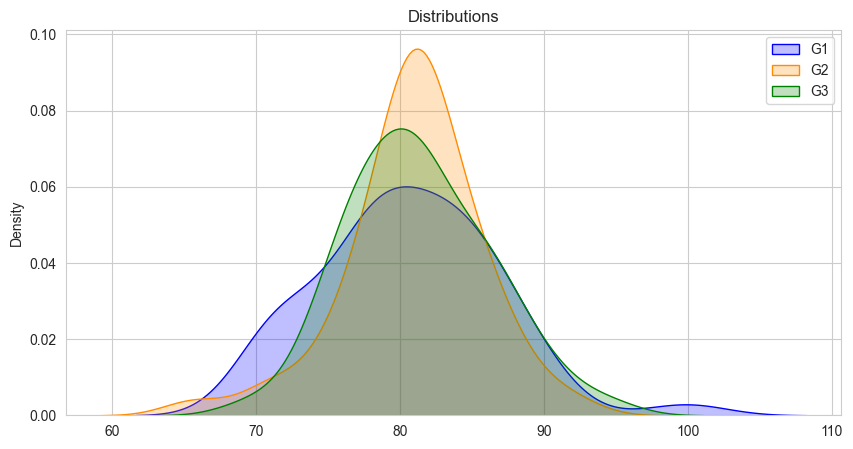

In [14]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(x=g1_grades, fill=True, color='blue',       label='G1')
ax = sns.kdeplot(x=g2_grades, fill=True, color='darkorange', label='G2')
ax = sns.kdeplot(x=g3_grades, fill=True, color='green',      label='G3')                  
ax.set(title='Distributions');
plt.legend(); 

In [15]:
print('--- ANOVA test ---')
print('    Ho: sample means are similar')
print('    Ha: there are at least two different means')
print('Sample 1:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g1_grades),np.mean(g1_grades), np.std(g1_grades)))
print('Sample 2:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g2_grades),np.mean(g2_grades), np.std(g2_grades)))
print('Sample 3:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g3_grades),np.mean(g3_grades), np.std(g3_grades)))
stat, pval = st.f_oneway(g1_grades, g2_grades, g3_grades)
print('f-value = %.3f    p-value = %.4f' %(stat, pval))
alpha = 0.05
if pval < alpha:    # alpha value is 0.05 or 5%
    print("%.4f <= %.2f We are rejecting null hypothesis" %(pval, alpha))
else:
    print("%.4f > %.2f We have no reason to reject the null hypothesis" %(pval, alpha))

--- ANOVA test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1:	n =50	Mean = 80.56	StdDev = 6.01
Sample 2:	n =48	Mean = 80.92	StdDev = 4.63
Sample 3:	n =52	Mean = 81.27	StdDev = 4.90
f-value = 0.232    p-value = 0.7930
0.7930 > 0.05 We have no reason to reject the null hypothesis


In [16]:
g4_grades = np.random.normal(75, 4, size=23)
print('g4_grades: Min = %.2f, Mean = %.2f, Max = %.2f' %(g4_grades.min(), np.mean(g4_grades), g4_grades.max()))

g4_grades: Min = 67.49, Mean = 73.47, Max = 81.08


In [17]:
print('--- ANOVA test ---')
print('    Ho: sample means are similar')
print('    Ha: there are at least two different means')
print('Sample 1:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g1_grades),np.mean(g1_grades), np.std(g1_grades)))
print('Sample 2:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g2_grades),np.mean(g2_grades), np.std(g2_grades)))
print('Sample 3:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g3_grades),np.mean(g3_grades), np.std(g3_grades)))
print('Sample 4:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g4_grades),np.mean(g4_grades), np.std(g4_grades)))
stat, pval = st.f_oneway(g1_grades, g2_grades, g3_grades, g4_grades)
print('f-value = %.3f    p-value = %.4f' %(stat, pval))
alpha = 0.05
if pval < alpha:    # alpha value is 0.05 or 5%
    print("%.4f <= %.2f We are rejecting null hypothesis" %(pval, alpha))
else:
    print("%.4f > %.2f We have no reason to reject the null hypothesis" %(pval, alpha))

--- ANOVA test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1:	n =50	Mean = 80.56	StdDev = 6.01
Sample 2:	n =48	Mean = 80.92	StdDev = 4.63
Sample 3:	n =52	Mean = 81.27	StdDev = 4.90
Sample 4:	n =23	Mean = 73.47	StdDev = 3.09
f-value = 14.648    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis


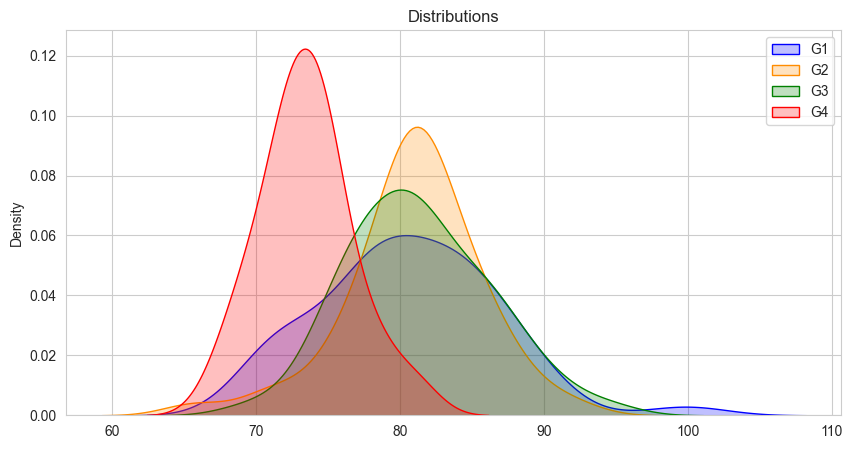

In [18]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(x=g1_grades, fill=True, color='blue',       label='G1')
ax = sns.kdeplot(x=g2_grades, fill=True, color='darkorange', label='G2')
ax = sns.kdeplot(x=g3_grades, fill=True, color='green',      label='G3')  
ax = sns.kdeplot(x=g4_grades, fill=True, color='red',        label='G4')                  
ax.set(title='Distributions');
plt.legend(); 

### Tuckey's Test

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [20]:
tukey_test = pairwise_tukeyhsd( endog=data.Grades,  # Data
                                groups=data.Group,  # Groups
                                alpha=0.05)         # Significance level

In [21]:
tukey_test.pvalues

array([0.93935769, 0.77462702, 0.94031661])

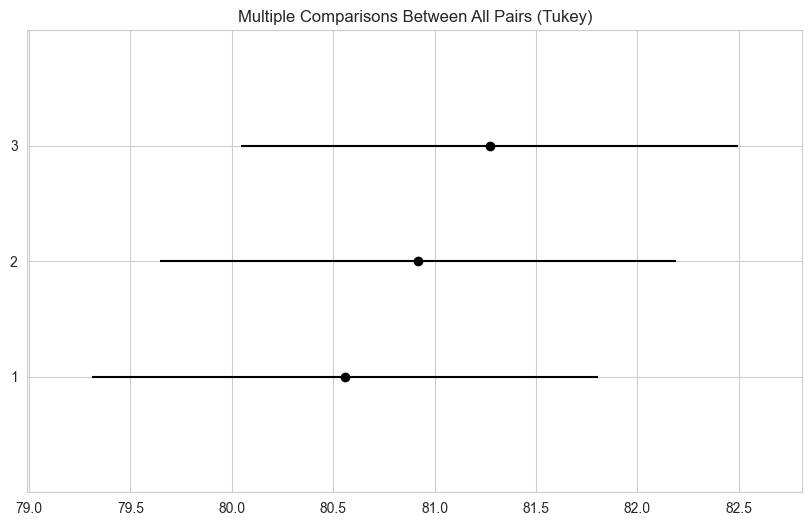

In [22]:
# Plotting groups confidence intervals
tukey_test.plot_simultaneous();

In [23]:
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.359,0.9394,-2.1636,2.8816,False
1,3,0.7117,0.7746,-1.7609,3.1843,False
2,3,0.3527,0.9403,-2.146,2.8514,False


There are no significant differences among groups.

In this case, it was not necessary to apply the Tukey Test because ANOVA test was not significant (p-value > 0.05).

Let's see what happen with 4 groups:

In [24]:
dfG4 = pd.DataFrame(columns=['Group','Grades'])
dfG4['Grades'] = g4_grades
dfG4['Group']  = 4
print(dfG4.shape)
dfG4.head(2)

(23, 2)


,Group,Grades
0,4,73.695494
1,4,73.466842


In [25]:
# Concatenating
data2 = pd.concat([data, dfG4], ignore_index=True)
print(data2.shape)

(173, 2)


In [26]:
# Applying Tukey Test to the 4 groups
tukey_test2 = pairwise_tukeyhsd(endog=data2.Grades,  # Data
                                groups=data2.Group,  # Groups
                                alpha=0.05)         # Significance level

In [27]:
tukey_test2.pvalues

array([9.84991971e-01, 8.92285808e-01, 5.79134018e-07, 9.85346686e-01,
       1.74583994e-07, 2.91943389e-08])

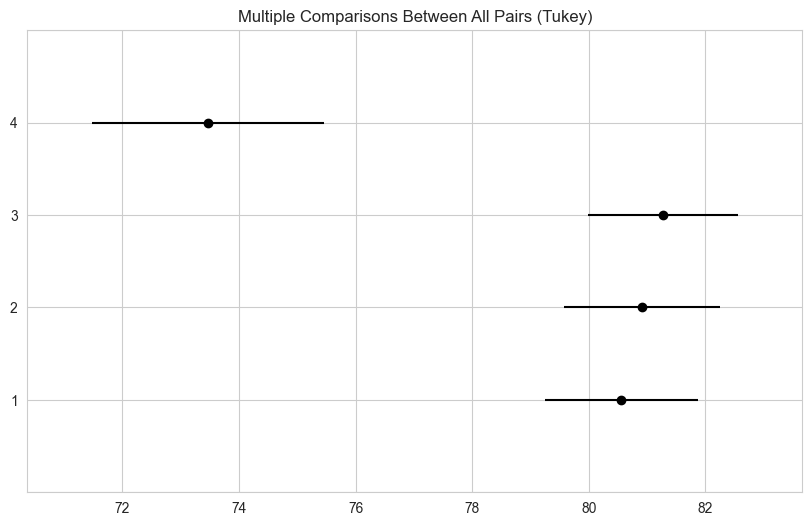

In [28]:
tukey_test2.plot_simultaneous();

There are significant differences between group 4 and the other three (groups 1, 2, and 3).

In [29]:
tukey_test2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.359,0.985,-2.2877,3.0057,False
1,3,0.7117,0.8923,-1.8825,3.3059,False
1,4,-7.088,0.0,-10.388,-3.788,True
2,3,0.3527,0.9853,-2.2689,2.9743,False
2,4,-7.447,0.0,-10.7686,-4.1255,True
3,4,-7.7997,0.0,-11.0796,-4.5198,True


### Kruskal-Wallis H Test

It is a non-parametric test.

The Kruskal–Wallis test by ranks, Kruskal–Wallis H test, or one-way ANOVA on ranks is a non-parametric method for testing whether samples originate from the same distribution. 

It is used for comparing two or more independent samples of equal or different sample sizes.

Assumptions
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

Interpretation
- Ho: the distributions of all samples are equal.
- Ha: the distributions of one or more samples are not equal.

In [30]:
print('--- Kruskal-Wallis H Test ---')
print('    Ho: sample means are similar')
print('    Ha: there are at least two different means')
print('Sample 1:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g1_grades),np.mean(g1_grades), np.std(g1_grades)))
print('Sample 2:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g2_grades),np.mean(g2_grades), np.std(g2_grades)))
print('Sample 3:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g3_grades),np.mean(g3_grades), np.std(g3_grades)))
stat, pval = st.kruskal(g1_grades, g2_grades, g3_grades)
print('f-value = %.3f    p-value = %.4f' %(stat, pval))
alpha = 0.05
if pval < alpha:    
    print("%.4f <= %.2f We are rejecting null hypothesis" %(pval, alpha))
else:
    print("%.4f > %.2f We have no reason to reject the null hypothesis" %(pval, alpha))

--- Kruskal-Wallis H Test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1:	n =50	Mean = 80.56	StdDev = 6.01
Sample 2:	n =48	Mean = 80.92	StdDev = 4.63
Sample 3:	n =52	Mean = 81.27	StdDev = 4.90
f-value = 0.419    p-value = 0.8110
0.8110 > 0.05 We have no reason to reject the null hypothesis


In [31]:
print('--- Non parametric Kruskal-Wallis H Test ---')
print('    Ho: sample means are similar')
print('    Ha: there are at least two different means')
print('Sample 1:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g1_grades),np.mean(g1_grades), np.std(g1_grades)))
print('Sample 2:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g2_grades),np.mean(g2_grades), np.std(g2_grades)))
print('Sample 3:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g3_grades),np.mean(g3_grades), np.std(g3_grades)))
print('Sample 4:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(g4_grades),np.mean(g4_grades), np.std(g4_grades)))
stat, pval = st.kruskal(g1_grades, g2_grades, g3_grades, g4_grades)
print('f-value = %.3f    p-value = %.4f' %(stat, pval))
alpha = 0.05
if pval < alpha:   
    print("%.4f <= %.2f We are rejecting null hypothesis" %(pval, alpha))
else:
    print("%.4f > %.2f We have no reason to reject the null hypothesis" %(pval, alpha))

--- Non parametric Kruskal-Wallis H Test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1:	n =50	Mean = 80.56	StdDev = 6.01
Sample 2:	n =48	Mean = 80.92	StdDev = 4.63
Sample 3:	n =52	Mean = 81.27	StdDev = 4.90
Sample 4:	n =23	Mean = 73.47	StdDev = 3.09
f-value = 36.506    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis


## Friedman Test

The Friedman test is a non-parametric statistical test developed by Milton Friedman. 

Similar to the parametric repeated measures ANOVA, it is used to detect differences in treatments across multiple test attempts. 

Assumptions:
- Observations in each sample can be ranked.
- Observations across each sample are paired.

Interpretation
- Ho: the distributions of all samples are equal.
- Ha: the distributions of one or more samples are not equal.

In [32]:
# Generating data
test1 = np.random.uniform(60,75,size=20)
test2 = np.random.uniform(70,85,size=20)
test3 = np.random.uniform(80,95,size=20)

In [33]:
print('--- Non-parametric Friedman Test ---')
print('    Ho: the distributions of all samples are equals')
print('    Ha: the distributions of one or more samples are not equals')
print('Sample 1:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(test1),np.mean(test1), np.std(test1)))
print('Sample 2:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(test2),np.mean(test2), np.std(test2)))
print('Sample 3:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(test3),np.mean(test3), np.std(test3)))
stat, pval = st.friedmanchisquare(test1, test2, test3)
print('f-value = %.3f    p-value = %.4f' %(stat, pval))
alpha = 0.05
if pval < alpha:   
    print("%.4f <= %.2f We are rejecting null hypothesis" %(pval, alpha))
else:
    print("%.4f > %.2f We have no reason to reject the null hypothesis" %(pval, alpha))

--- Non-parametric Friedman Test ---
    Ho: the distributions of all samples are equals
    Ha: the distributions of one or more samples are not equals
Sample 1:	n =20	Mean = 66.97	StdDev = 4.15
Sample 2:	n =20	Mean = 78.94	StdDev = 3.75
Sample 3:	n =20	Mean = 86.08	StdDev = 4.07
f-value = 38.100    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis


## References

- Dekking, F.M. et.al. (2005) A Modern Introduction to Probability and Statistics, USA: Springer